In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns
from sklearn.ensemble import IsolationForest
import joblib
os.chdir('Resources/')

In [2]:
df = pd.read_csv('5_Preprocessed_Data.csv')

X = df.drop(['HeartDisease'], axis='columns')
Y = df[['HeartDisease']]

Accuracy for train size 0.1 : 0.7360909254407497
Accuracy for train size 0.2 : 0.7632631700823825
Accuracy for train size 0.30000000000000004 : 0.7916174045924318
Accuracy for train size 0.4 : 0.8124587396721042
Accuracy for train size 0.5 : 0.8642451426502078
Accuracy for train size 0.6 : 0.8848284676028578
Accuracy for train size 0.7000000000000001 : 0.9100937581956464
Accuracy for train size 0.8 : 0.9333887657058387
Accuracy for train size 0.9 : 0.9525465838509317


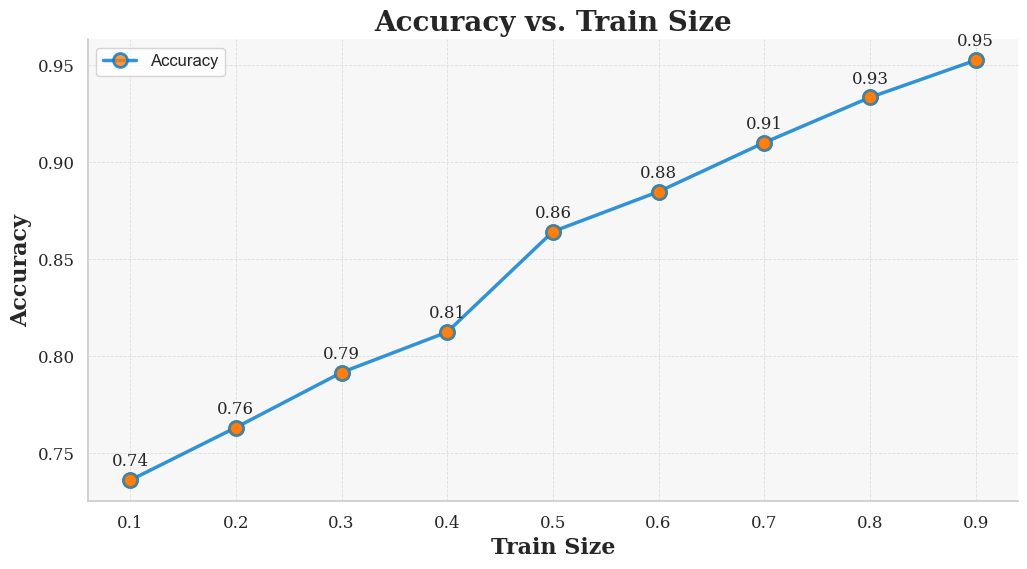

In [3]:
seed = 518

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_rf = []
model_rf = None

for train_size in train_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    rf = DecisionTreeClassifier(random_state=seed)
    model_rf = rf.fit(X_train, Y_train.values.ravel()) 
    
    pred = model_rf.predict(X_test)
    accuracy_rf = roc_auc_score(Y_test, pred)
    
    accuracies_rf.append(accuracy_rf)
    print("Accuracy for train size", train_size, ":", accuracy_rf)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_rf, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_rf):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_rf[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_rf):
    plt.plot(train_sizes[i], accuracies_rf[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_rf[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

Accuracy for train size 0.1: 0.7247252747252747
Accuracy for train size 0.2: 0.7762669962917181
Accuracy for train size 0.3: 0.8060755916637231
Accuracy for train size 0.4: 0.8343634116192831
Accuracy for train size 0.5: 0.847675568743818
Accuracy for train size 0.6: 0.8813349814585909
Accuracy for train size 0.7: 0.8822075782537068
Accuracy for train size 0.8: 0.8936959208899876
Accuracy for train size 0.9: 0.9111111111111111


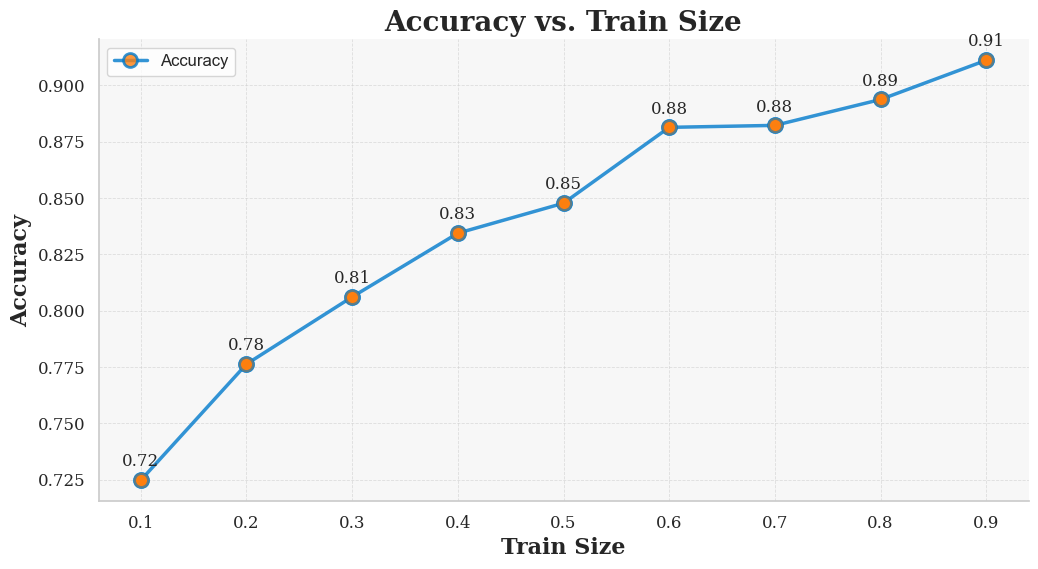

In [4]:
seed = 3089

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_pca = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    pca = PCA(n_components=9)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    rf_pca = RandomForestClassifier(random_state=seed)
    rf_pca.fit(X_train_pca, Y_train.values.ravel())
    
    pred_pca = rf_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(Y_test, pred_pca)
    
    accuracies_pca.append(accuracy_pca)
    print(f"Accuracy for train size {train_size:.1f}: {accuracy_pca}")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_pca, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_pca):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_pca[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_pca):
    plt.plot(train_sizes[i], accuracies_pca[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_pca[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

Accuracy for train size 0.1: 0.7895604395604395
Accuracy for train size 0.2: 0.8318912237330037
Accuracy for train size 0.3: 0.8452843518191452
Accuracy for train size 0.4: 0.8693860733415739
Accuracy for train size 0.5: 0.8892185954500494
Accuracy for train size 0.6: 0.8986402966625463
Accuracy for train size 0.7: 0.92833607907743
Accuracy for train size 0.8: 0.9493201483312732
Accuracy for train size 0.9: 0.9530864197530864


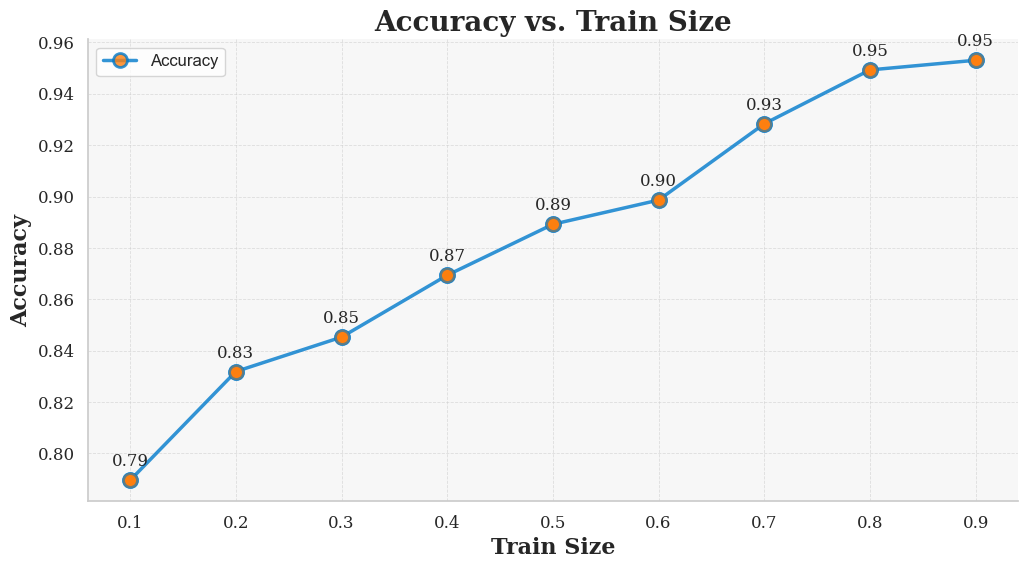

In [5]:
seed = 310

train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_isolation = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)

    clf = IsolationForest(contamination=0.08, random_state=seed)
    outliers = clf.fit_predict(X_train)
    X_train = X_train[outliers == 1]
    Y_train = Y_train[outliers == 1]

    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    X_train_selected = X_train.drop(to_drop, axis=1)
    X_test_selected = X_test.drop(to_drop, axis=1)

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
    rf_classifier.fit(X_train_selected, Y_train.values.ravel())

    Y_pred = rf_classifier.predict(X_test_selected)

    accuracy_isolation = accuracy_score(Y_test, Y_pred)

    accuracies_isolation.append(accuracy_isolation)
    print(f"Accuracy for train size {train_size:.1f}: {accuracy_isolation}")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracies_isolation, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
plt.title('Accuracy vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(accuracies_isolation):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], accuracies_isolation[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['Accuracy'], fontsize=12)

sns.despine()

for i, txt in enumerate(accuracies_isolation):
    plt.plot(train_sizes[i], accuracies_isolation[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], accuracies_isolation[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

In [8]:
train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_lstm = []
seed = 274
mx=7.520991458825032
ind=47

for i in range(101, 200):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    full = []
    
    for j in range(1, 10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1*j, random_state=seed)

        X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        model = Sequential()
        model.add(LSTM(11, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
        model.add(Dropout(0.01 * 4))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = Adam(learning_rate=1/7)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        model.fit(X_train_reshaped, Y_train, epochs=i, batch_size=10000, verbose=0)

        X_train_features = model.predict(X_train_reshaped)
        X_test_features = model.predict(X_test_reshaped)

        rf_classifier = DecisionTreeClassifier(random_state=seed)
        rf_classifier.fit(X_train_features, Y_train.values.ravel())

        Y_pred = rf_classifier.predict(X_test_features)
        accuracy_lstm = f1_score(Y_test, Y_pred)

        full.append(accuracy_lstm)

    accuracy_nb = sum(full)
    
    if(accuracy_nb>mx):
        mx=accuracy_nb
        ind=i
    
    print(i, accuracy_nb, mx, ind)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101 7.477606514279435 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102 7.452716204079547 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
103 7.470861213705778 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104 7.429717360921876 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105 7.428289346047226 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
106 7.444796777278328 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
107 7.483822336514881 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
108 7.449995160672892 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
109 7.443085121492569 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
110 7.442685417874296 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
111 7.447195655595257 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112 7.457913281536124 7.520991458825032 47


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
print(mx, ind)

7.520991458825032 47
